# Table of contents

1. [What would you find in this project?](#what-would-you-find-in-this-project)
2. [Exploratory Data Analysis](#ExploratoryDataAnalysis)
    1. [Import data](#Importdata)
    2. [A First round of feature engineering](#FFE)
    3. [EDA](#EDAN)
    4. [Seed questions](#SEED)
    5. [Summary of EDA](#SUMMARY)
3. [Machine Learning](#ML)
    1. [Outliers](#OUTLIERS)
    2. [Transform categorical variables to numerical](#TRANSFORMCAT)
    3. [Input missing values](#NULL)
    4. [Performance Metrics](#METRIC)
    5. [Visual Inspection](#VISUAL)
    6. [Models](#Models)
        1. [Centroid-based Clustering](#CENTROID)
            1. [K-means](#KMEANS)
            2. [K-means++](#KMEANS++)
            3. [K-medoids](#KMEDOIDS)
        2. [Distribution-based Clustering](#DISTRIBUTION)
            1. [Gaussian Mixture Model](#GAUSSIAN)
        3. [Density-based Clustering](#DENSITY)
            1. [DBSCAN](#DBSCAN)
            2. [HDBSCAN](#HDBSCAN)
        4. [Hierarchical Clustering](#HIERARCHICAL)
            1. [Agglomerative](#AGGLOMERATIVE)
        6. [First Model Comparison](#1MC)
        7. [Apply standardization](#STANDARIZATION)
        8. [Best Model](#BEST)
            1. [Interpretation](#INTERPRET)
        9. [Bonus: Pycaret](#PYCARET)
4. [Production](#PRODUCTION)
    1. [Share model results with the company](#SHARE)

<a id="what-would-you-find-in-this-project"></a>
# What would you find in this project?

The purpose of this project is to deal with a **real world clustering problem and approach it with a business concern**: from explaining the insights we can get just from the data, find a ML model that would fit on the clustering problem and finally put into production the model and the insights we can get from it.

For this project I've chosen [this](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) Kaggle dataset. This dataset contains information of clients of an online store: from personal information to the money spend in different sections of the store. 

In the case of a business, how to take [advantage](https://analyticahouse.com/blog/importance-customer-segmentation) of the information of your customers? Well, if we are able to segment our customers will also be able to develop a deeper understanding of them and develop specific marketing strategies for them.

So, in the following sections we will put ourselves in the shoes of company, which want to understand which useful insights we can get from their customer data, train a model able to cluster their clients and take advantage of this client segmentation to increase the turnover.

<a id='ExploratoryDataAnalysis'></a>
# Exploratory Data Analysis

In any ML project, the [first step](https://www.bitstrapped.com/blog/exploratory-data-analysis-accelerates-machine-learning) that should be done is an exploratory data analysis, not only because doing this will help us to understand better the data we're working with, but also let us know if there are problems in the data we're working on prior trying to model it, let us know that the model we've trained is reliable and finally is a first step to bring useful insights without even have to train a model.

<a id='Importdata'></a>
## Import data

First of all, we'll import (and install) all necessary libraries we'll need in this notebook.

In [1]:
#pip install pycaret
from  hdbscan import HDBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.tree import _tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, roc_auc_score, precision_score
from matplotlib import colors
from matplotlib.colors import ListedColormap
import shap
import pickle
import warnings
warnings.filterwarnings('ignore') #For a cleaner lecture
%matplotlib inline

Now, we can import the data and take a look to the first rows:

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


Let's take a look to the features of our dataset, the type of each features inferred from pandas and the count of not null values:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

As we can see above we have a dataset with 2240 rows and 29 columns. [Here](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/?select=marketing_campaign.csv) you can see a description of each feature, get from the kaggle dataset.


The feature ID is a unique identifier for each customer, so it doesn't have any relevance to get any insight from it or for training the model, that's why we'll delete this from the dataset:

In [4]:
df.drop(columns = ['ID'], inplace = True)

<a id='FFE'></a>
## A First round of feature engineering 

Taking a look info the description of each Education, we can realise that it is an ordinal feature. Let's do a numerical transformation to this feature in order to work in an easier way with it:

In [5]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [6]:
# Making Dictionaries of ordinal features
educational_map = { 
    'Basic' :         1,
    '2n Cycle' :      2,
    'Graduation' :    3,
    'Master' :        4,
    'PhD' :           5   
    }

# Transforming Categorical features into numerical features
df_first_transform = df.copy()
df_first_transform.loc[:,'Education'] = df_first_transform['Education'].map(educational_map)
df_first_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   int64  
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

As we can see above, the education feature has been changed to a int64 type (due there aren't any null values). 

Finally, let's add some more interesting features. First, let's **transform the date feature** of DT_customer (Date of customer's enrollment with the company) to the days since the customer enrolled the company. Doing this we'll be able to work with this information in an easier way. We don't have information about the date this dataset was created, so let's suppose that is a week later than the last customer enrolled the company.

In [7]:
#Tranform DT_Cutomer Column to Date Column
df_first_transform['Dt_Customer'] = df_first_transform['Dt_Customer'].apply(pd.to_datetime)
#Get the actual date supposed
supposed_actual_date = df_first_transform['Dt_Customer'].max() + pd.DateOffset(days=7)
print(supposed_actual_date)
#Calculate difference between actual date and the date the customer enrolled the company. Create new column
df_first_transform['EnrolledDays'] = (supposed_actual_date - df_first_transform['Dt_Customer']) / np.timedelta64(1, 'D')
df_first_transform.drop(columns = ['Dt_Customer'], inplace = True)

2014-12-13 00:00:00


Secondly, create some aggregations of original features, like: total of money spent, number of children and if the customer is a parent:

In [8]:
#Total spendings on various items
df_first_transform["Spent"] = df_first_transform["MntWines"]+ df_first_transform["MntFruits"]+ df_first_transform["MntMeatProducts"]+ df_first_transform["MntFishProducts"]+ df_first_transform["MntSweetProducts"]+ df_first_transform["MntGoldProds"]

#Total purchases on various channels
df_first_transform["Purchases"] = df_first_transform["NumWebPurchases"]+ df_first_transform["NumCatalogPurchases"]+ df_first_transform["NumStorePurchases"]

#Feature indicating total children living in the household
df_first_transform["Children"]=df_first_transform["Kidhome"]+df_first_transform["Teenhome"]

#Feature pertaining parenthood
df_first_transform["Is_Parent"] = np.where(df_first_transform.Children> 0, 1, 0)

<a id='EDAN'></a>
## Exploratory Data Analysis

The first thing we want to discover about our company is with which products we get more income. To do so, we'll plot the amount spent by our clients for each product:

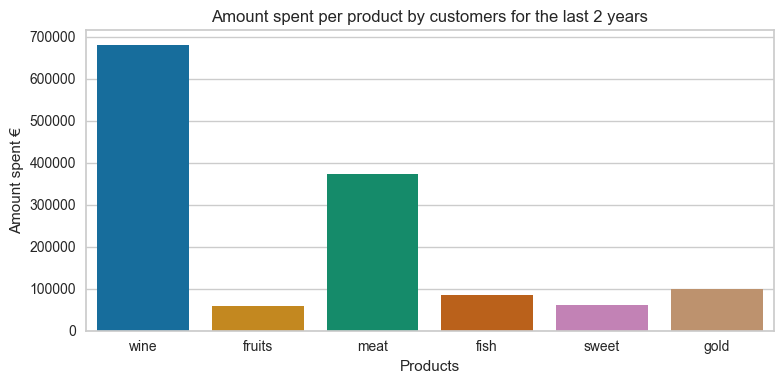

In [9]:
amount_spend_wine = df_first_transform["MntWines"].sum()
amount_spend_fruits = df_first_transform["MntFruits"].sum()
amount_spend_meat = df_first_transform["MntMeatProducts"].sum()
amount_spend_fish = df_first_transform["MntFishProducts"].sum()
amount_spend_sweet = df_first_transform["MntSweetProducts"].sum()
amount_spend_gold = df_first_transform["MntGoldProds"].sum()

products_and_amount = [['wine', amount_spend_wine], ['fruits', amount_spend_fruits], ['meat', amount_spend_meat], ['fish', amount_spend_fish], ['sweet', amount_spend_sweet], ['gold', amount_spend_gold]]
 
df_products_and_amount = pd.DataFrame(products_and_amount, columns=['Product', 'Amount'])

plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=df_products_and_amount['Product'], y=df_products_and_amount['Amount'], palette='colorblind', ci=None)
ax.set(title='Amount spent per product by customers for the last 2 years', xlabel='Products', ylabel='Amount spent €')
plt.show()

The top income product is the wine (almost 700K€) and then the meat (almost 400K€). The less income products are fruits and sweet (less than 100K€).

This company, also has diferent channels for selling. Which one is more important in terms of purchases?

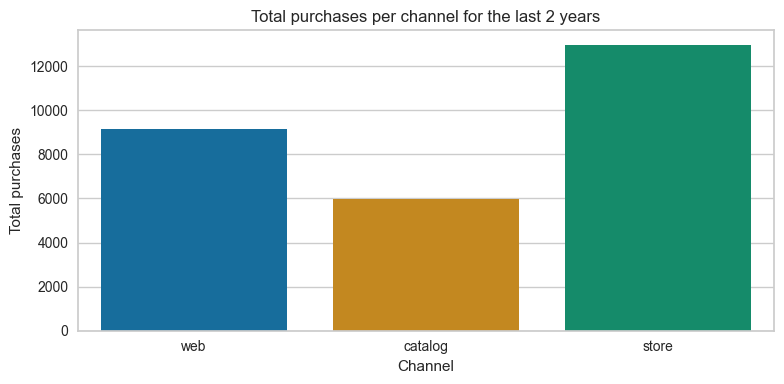

In [10]:
# purchases_by_deals = df_first_transform["NumDealsPurchases"].sum()
purchases_by_web = df_first_transform["NumWebPurchases"].sum()
purchases_by_catalog = df_first_transform["NumCatalogPurchases"].sum()
purchases_by_store = df_first_transform["NumStorePurchases"].sum()

purchases_by_channel = [['web', purchases_by_web], ['catalog', purchases_by_catalog], ['store', purchases_by_store]]  #['deals', purchases_by_deals], 
 
df_purchases_by_channel = pd.DataFrame(purchases_by_channel, columns=['Channel', 'Purchases'])

plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=df_purchases_by_channel['Channel'], y=df_purchases_by_channel['Purchases'], palette='colorblind', ci=None)
ax.set(title='Total purchases per channel for the last 2 years', xlabel='Channel', ylabel='Total purchases')
plt.show()


The most important channel of selling is the physical store, followed by the web and then by the catalog.

In addition, this company launches campaigns with special offers to increase sales. This last 2 years, there's has been 6 campaign, which one worked better?

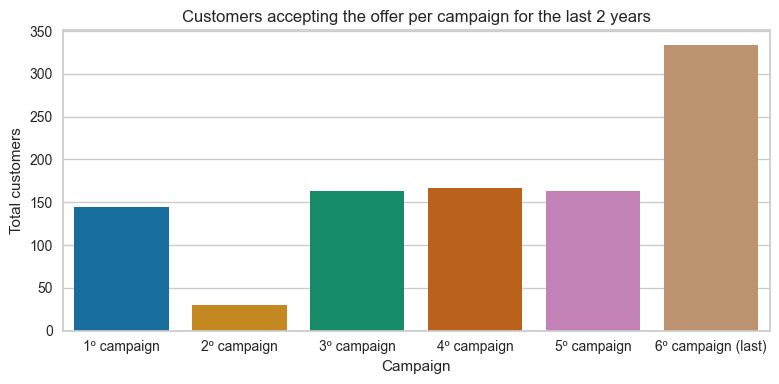

In [11]:
# purchases_by_deals = df_first_transform["NumDealsPurchases"].sum()
accepted_campaign_1 = df_first_transform["AcceptedCmp1"].sum()
accepted_campaign_2 = df_first_transform["AcceptedCmp2"].sum()
accepted_campaign_3 = df_first_transform["AcceptedCmp3"].sum()
accepted_campaign_4 = df_first_transform["AcceptedCmp4"].sum()
accepted_campaign_5 = df_first_transform["AcceptedCmp5"].sum()
accepted_campaign_6 = df_first_transform["Response"].sum()

accepted_campaign = [['1º campaign', accepted_campaign_1], ['2º campaign', accepted_campaign_2], ['3º campaign', accepted_campaign_3], ['4º campaign', accepted_campaign_4], ['5º campaign', accepted_campaign_5], ['6º campaign (last)', accepted_campaign_6], ]
 
df_accepted_campaign = pd.DataFrame(accepted_campaign, columns=['Campaign', 'Total Customers'])

plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=df_accepted_campaign['Campaign'], y=df_accepted_campaign['Total Customers'], palette='colorblind', ci=None)
ax.set(title='Customers accepting the offer per campaign for the last 2 years', xlabel='Campaign', ylabel='Total customers')
plt.show()


As we can see above, the last campaign is the one that worked better, with more than 300 customers accepting this last one offer.

For a better understanding of our dataset, we'll take a look if exists a relation between the features. To do so, we'll calculate the **pearson correlation** (because we're working with continuous variables). We'll only do the exploratory data analysis with features with the greatest correlation.

<AxesSubplot: >

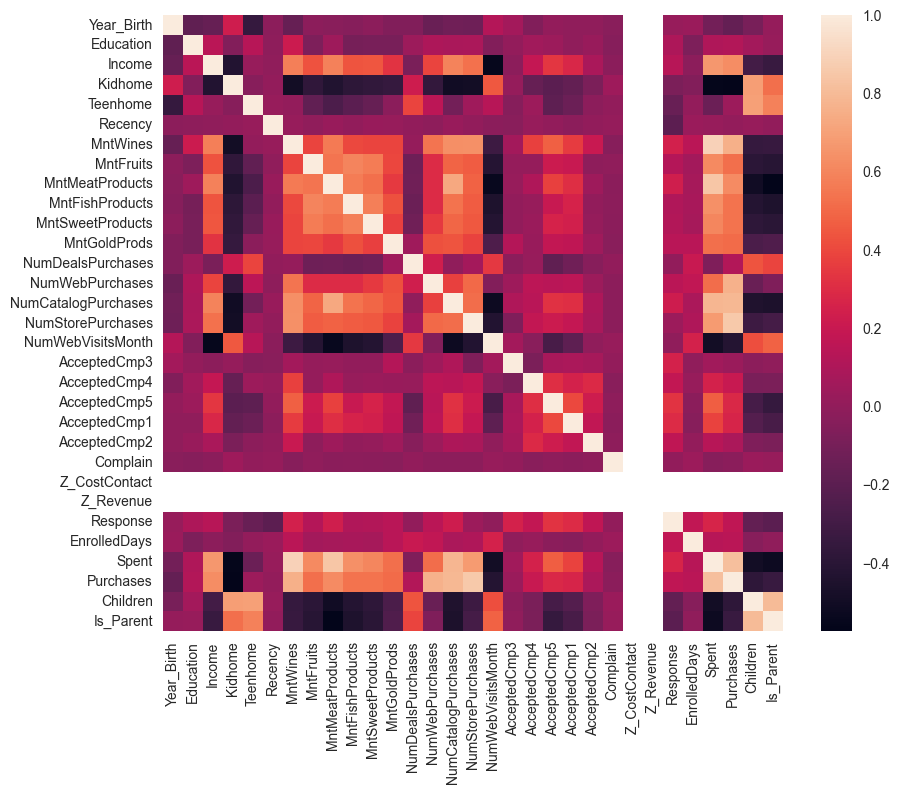

In [12]:
corrmat = df_first_transform.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat)

Note that in the correlation matrix above, there are two features: Z_CostContact and Z_revenue that **seem not to have any correlation value**. This could be because the standard deviation of these features is 0, and then the correlation value of any of these features is null. If the standard deviation is 0 is because there is no variation of the values respect to the mean, i.e., all the values of these features are the same exact value. Let's check it out:

In [13]:
print("Values for Z_CostContact:\n")
print(df_first_transform['Z_CostContact'].unique())
print("\nValues for Z_Revenue:\n")
print(df_first_transform['Z_Revenue'].unique())

Values for Z_CostContact:

[3]

Values for Z_Revenue:

[11]


As we can see above, there two features have a constant value, so let's remove them from the dataset, because they don't provide any useful information:

In [14]:
df_first_transform.drop(columns = ['Z_CostContact'], inplace = True)
df_first_transform.drop(columns = ['Z_Revenue'], inplace = True)

Now, let's filter the previous correlation matrix above by the most correlated values. For [Person correlation](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/), we can assume that from +-0.3 to +- 0.49, we have a a moderate correlation. From +-0.5 to +-0.69 we have a strong correlation and +-0.7 to +-1 we have a very strong correlation. Let's check how many features we have with these correlation values (we'll only print the lower triangle, without the diagonal):

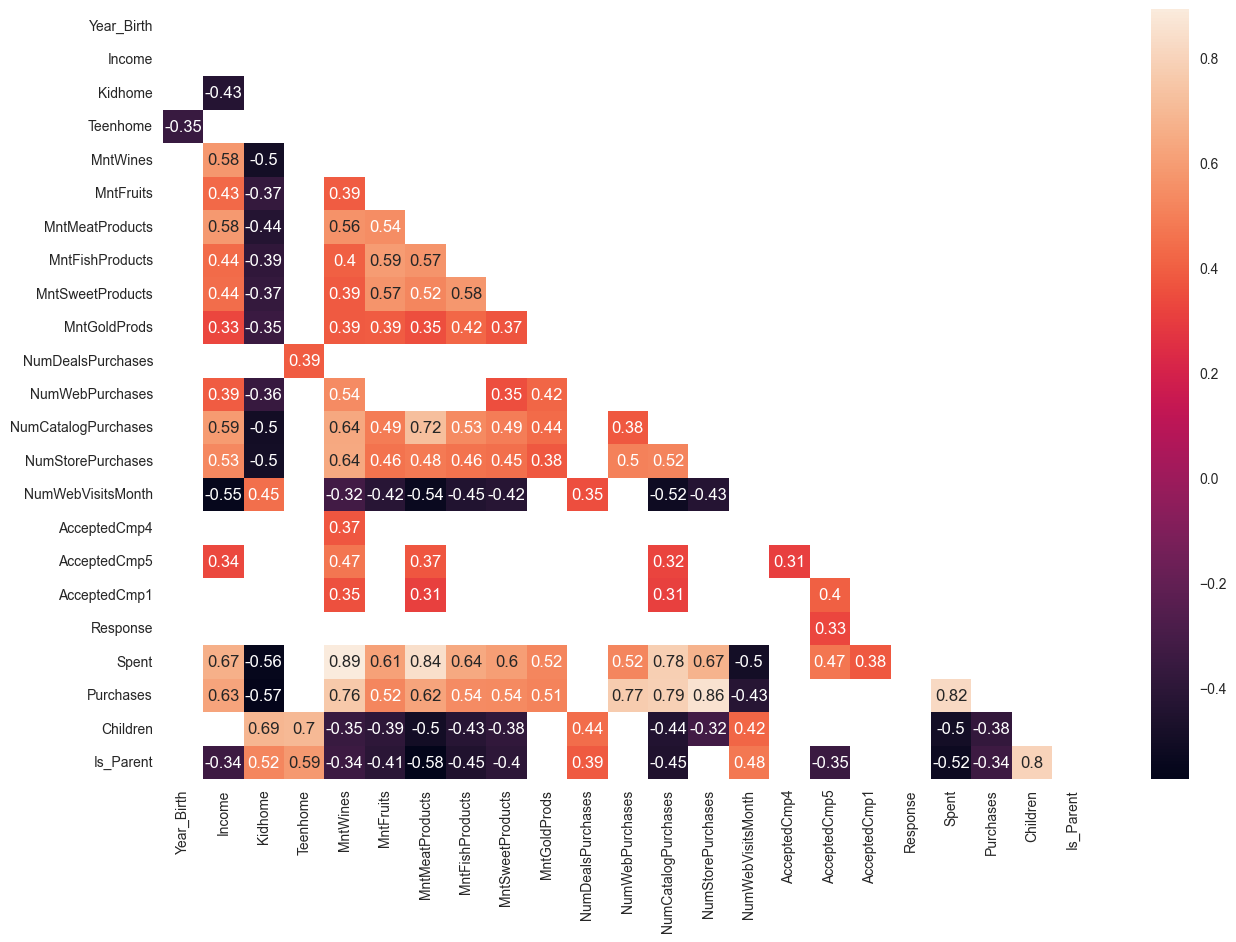

In [15]:
top_corr_features = corrmat[(abs(df_first_transform.corr())>=0.3) & (abs(df_first_transform.corr())<1)].dropna(axis=1, how='all').dropna(axis=0, how='all')
plt.figure(figsize=(15,10))

# Getting the Upper Triangle of the correlation matrix
matrix = np.triu(top_corr_features)
# using the upper triangle matrix as mask 
g = sns.heatmap(top_corr_features,annot=True, mask=matrix)

We can appreciate a high number of high correlation values. This could mean that could be a good idea applying Principal Components Analysis if we want to reduce the dimensionality of the dataset.

Because there are so many features correlated, let's focus on the highest correlations:

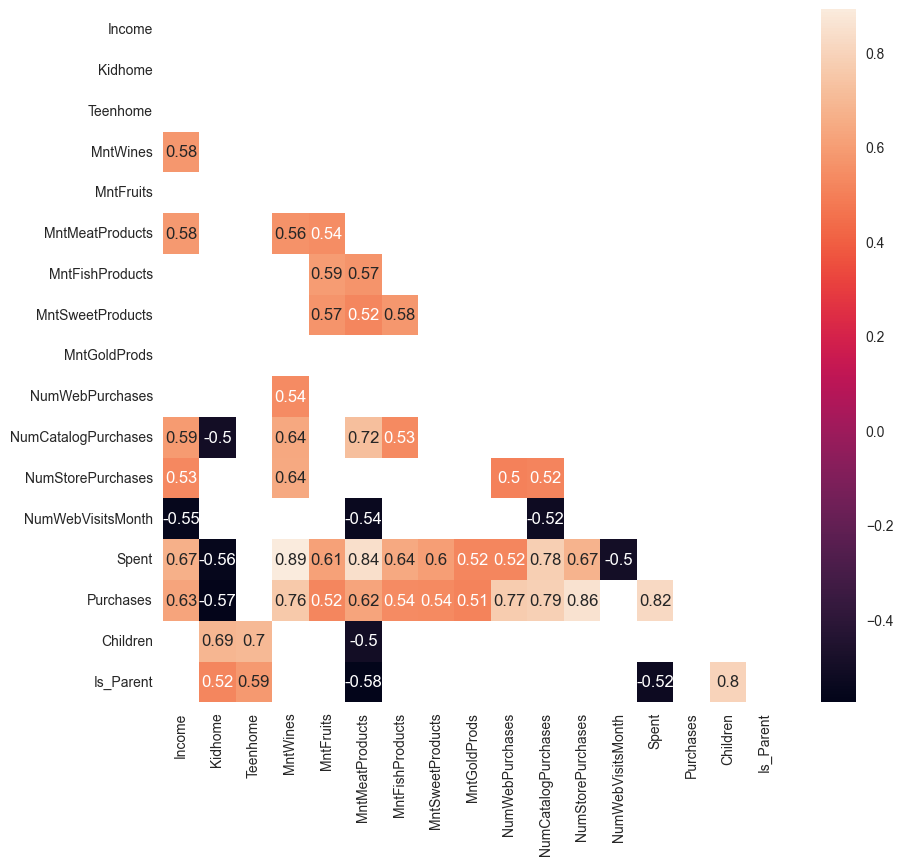

In [16]:
top_corr_features = corrmat[(abs(df_first_transform.corr())>=0.5) & (abs(df_first_transform.corr())<1)].dropna(axis=1, how='all').dropna(axis=0, how='all')
plt.figure(figsize=(10,9))

# Getting the Upper Triangle of the correlation matrix
matrix = np.triu(top_corr_features)
# using the upper triangle matrix as mask 
g = sns.heatmap(top_corr_features,annot=True, mask=matrix)

About the correlation matrix above, we can highlight the following:

- The highest correlation (not from aggregates, in that case is obvious the high correlations) is between the number of purchases made using a catalogue (NumCatalogPurchases) and the amount spent on meat in the last 2 years (MntMeatProducts). This means that for **higher number of purchases using the catalog of the client, also the higher the amount spent on meat** by the client.
- About the amount spent on products, the most correlated products are the wine and the meat, so these two products are the products which the customers spent more. The amount spent is highly correlated with the number of purchases using the catalog, so we can assume that **the most amount spent is made using the catalog** rather than others channels.
- There are a negative correlation between the number of visits to the company's website in the last month (NumWebVisitsMonth) and income, the amount spent on meat and the number of purchases using the catalogue. That means that for higher number of visits on the web, lower values for these three features, which is curious that exist these correlations in between these features so different.
- Income feature is positively correlated with the amount of store and catalog purchases, this means that greater income levels, the greater number of purchases in the store and using the catalog, but not correlated with the number of web purchases, which is interesting. This could mean that **people with high value for income prefer to buy in the store or using the catalog**. On the other hand, people with greater income also spend more, which makes sense.


On the other hand, let's check the principal statistic metrics of all numerical features:

In [17]:
df_first_transform.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1952.0,1959.00,1970.0,1977.00,1984.0,1996.0
Education,2240.0,3.460268,1.004337,1.0,2.0,3.00,3.0,4.00,5.0,5.0
Income,2216.0,52247.251354,25173.076661,1730.0,24117.5,35303.00,51381.5,68522.00,79844.0,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.0,0.00,0.0,1.00,1.0,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.0,0.00,0.0,1.00,1.0,2.0
Recency,2240.0,49.109375,28.962453,0.0,9.0,24.00,49.0,74.00,89.0,99.0
MntWines,2240.0,303.935714,336.597393,0.0,6.0,23.75,173.5,504.25,822.1,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,0.0,1.00,8.0,33.00,83.0,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,7.0,16.00,67.0,232.00,499.0,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,0.0,3.00,12.0,50.00,120.0,259.0


With  the principal statistical metrics, we can tell the big picture of our customers:
1. About the **personal aspects**: Our customers are in between their 70's and 40's. At least the 75% of our customers have a graduate level of education. The 80% of our customers have an income in between 24K and 80K. At least, the 50% have children.
2. About the **aspects as consumers**: The 80% of the customers spend in between 35€ and 1,5K€ in the last two years, so, it means that they are occasionally consumers or have a low consume per month (62,5€ at maximum). The product with the highest amount spent is meat, and the lowest is fruit. About the purchases, are in between 6 and 23 for the last two years. In general, we can note a **low number of purchases and amount spent per month**.
3. About the **relationship with the company**: At least to 90% of the customers has been enrolled at least 6 months and haven't written any complaints, which is good news. 


Also, we can appreciate outlier values in the feature Age because we have a customer born in 1893 (so, this customer would be 131 years old) and also we could see a very high max value for Income (>600K), which highly differs from the mean (52K).

We'll treat this outliers values in a later section.

<a id='SEED'></a>
## Seed questions to understand better the data and its peculiarities

### About the offers strategy, how many customers have accepted offers and how many offers?

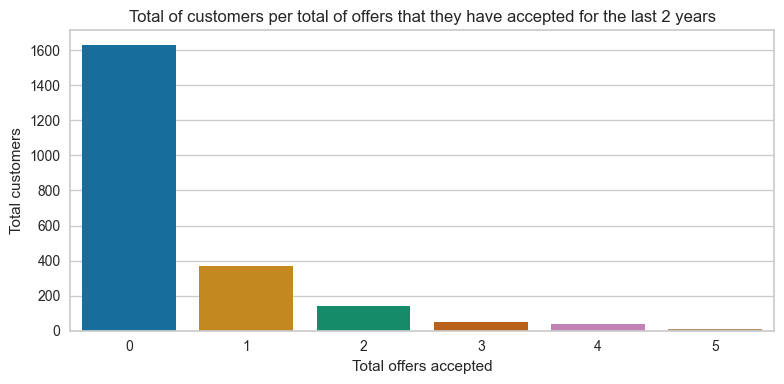

In [18]:
# Get how many deals acepted per customer and plot it
df_first_transform['Total_Offers_Accepted'] =  df_first_transform["AcceptedCmp1"] + df_first_transform["AcceptedCmp2"] + df_first_transform["AcceptedCmp3"] + df_first_transform["AcceptedCmp4"] + df_first_transform["AcceptedCmp5"] + df_first_transform["Response"]
df_Total_Offers_Accepted = df_first_transform['Total_Offers_Accepted'].value_counts().to_frame()

plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=df_Total_Offers_Accepted.index, y=df_Total_Offers_Accepted['Total_Offers_Accepted'], palette='colorblind', ci=None)
ax.set(title='Total of customers per total of offers that they have accepted for the last 2 years', xlabel='Total offers accepted', ylabel='Total customers')
plt.show()

As we can see above, the majority of the clients (more than 1600) haven't accepted any offer in the last two years. Almost 400 customers have accepted one offer, and very few have accepted more than two offers. In a nutshell, only the 27.19% of customers have accepted a offer:

In [19]:
round(float((1-df_Total_Offers_Accepted.loc[0,:]/df_Total_Offers_Accepted.sum())*100),2)

27.19

### About the deals strategy, how many customers have bought a deal? Which percentage of their purchases are deals?

Percenatge of clients that have purchased a deal: 97.95%.


<AxesSubplot: >

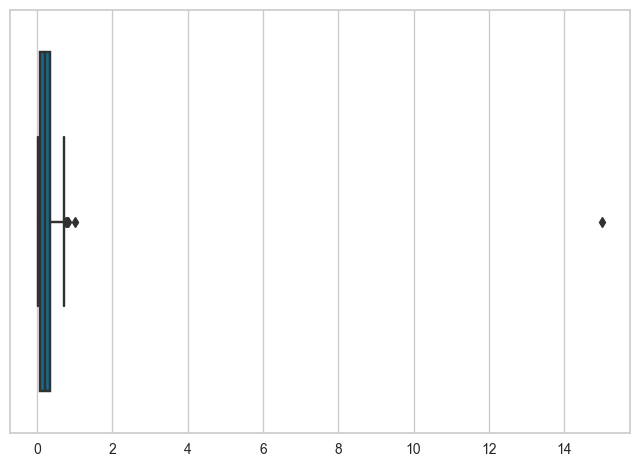

In [20]:
df_first_transform['Customer_purchase_deal'] = df_first_transform['NumDealsPurchases'] > 0
tmp = df_first_transform['Customer_purchase_deal']
index_bought_deal = tmp[tmp].index
index_not_bought_deal = df_first_transform.index.difference(index_bought_deal)

# Calculate the percentage of clients that have purchased a deal
perc_clients_purchased_deal = round(100*len(index_bought_deal)/df_first_transform.shape[0],2)
print("Percenatge of clients that have purchased a deal: " + str(perc_clients_purchased_deal) + "%.")

# Calculate the percentils of the percentage of deals per customer
tmp = df_first_transform.loc[index_bought_deal]
perc_deals_purchases = tmp['NumDealsPurchases']/tmp['Purchases']
sns.boxplot(x=perc_deals_purchases)

Above we can see two things. The first one is that almost every customer (97.95%) has bought a deal, so we can think that the deals we've launched had a good response. Secondly, in the boxplot of percentage of deals per customer, we can see values greater than 1, which is not possible, so it might be that we have something wrong in our data, let's see:

In [21]:
tmp = (df_first_transform['Purchases'] < df_first_transform['NumDealsPurchases'])
index_wrong = tmp[tmp].index
df_first_transform[['Purchases','NumDealsPurchases']].loc[index_wrong]

,Purchases,NumDealsPurchases
1042,1,15
1245,0,15
1846,0,15


Indeed, we have 3 customers with wrong data, because is not possible to have more deal purchases that the total purchases. Let's correct these values and replot the boxplot: 

count    2192.000000
mean        0.245872
std         0.170816
min         0.000000
25%         0.090909
50%         0.214286
75%         0.349105
max         1.000000
dtype: float64

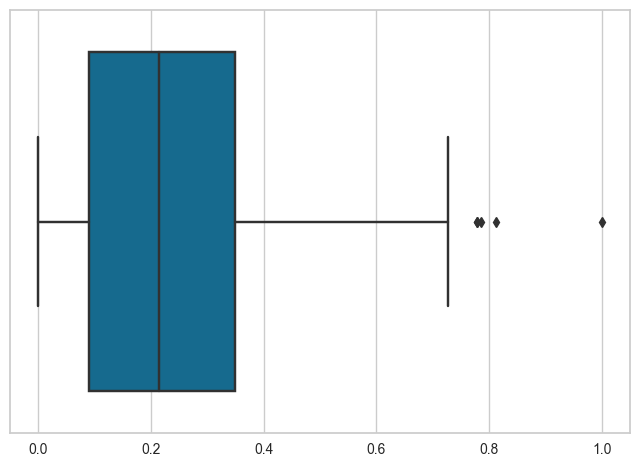

In [22]:
df_first_transform.loc[index_wrong,'NumDealsPurchases']=0
# Calculate the percentils of the percentage of deals per customer
tmp = df_first_transform.loc[index_bought_deal]
perc_deals_purchases = tmp['NumDealsPurchases']/tmp['Purchases']
sns.boxplot(x=perc_deals_purchases)
perc_deals_purchases.describe()

As we can see above, half of the customers has purchased no more than 21,42% of deals in their total purchases.

### About the web usage, how many times our customers visit the web? 

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

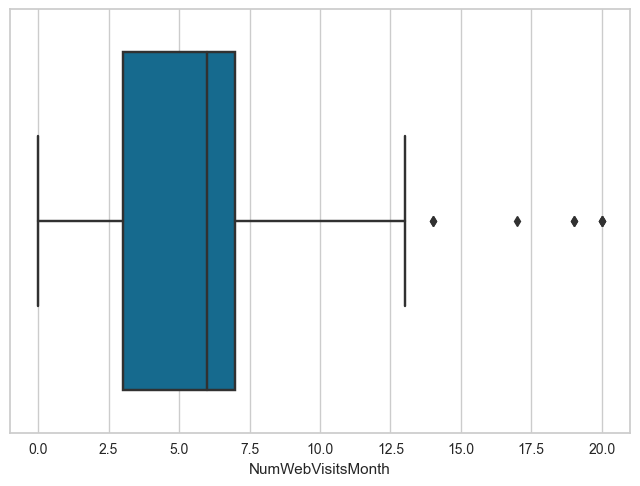

In [23]:
sns.boxplot(x=df_first_transform['NumWebVisitsMonth'])
df_first_transform['NumWebVisitsMonth'].describe()

As we can see above, three quarters of our customers don't visit the webside more than 7 times per month.

<a id='SUMMARY'></a>
## Summary of bussiness analytics

In this section we've said many things about this dataset. Let's just summarize all above in the following take aways:

-  The **top income product is the wine** (almost 700K€) and then the **meat** (almost 400K€). The less income products are fruits and sweet (less than 100K€).
- The most **important channel of selling is the physical store**, followed by the web and then by the catalog.
- As we can see above, the last campaign is the one that worked better, with more than 300 customers accepting this last one offer, but in general offers don't have great acceptance, only the 27.19% of the customers have accepted at least an offer.
- Customers with high value for income prefer to buy in the store or using the catalog. Also, is by **the catalogue where   the most amount spent**.
- Almost every customer (97.95%) has bought a deal, so we can think that **the deals we've launched had a good response**.
- Our customers are in between their 70's and 40's. At least the 75% of our customers have a graduate level of education. The 80% of our customers have an income in between 24K and 80K. At least, the 50% have children.
- Our customers **purchases are low in number and in the amount spend**.
- The data present outliers in Income and Year_Birth and features Z_CostContact and Z_revenue should be checked because present constant values.



<a id='ML'></a>
# Machine Learning

In the previous part of this project, we've had examined a dataset with many features that describe the customers of a business. Now, we're moving on to the Machine Learning part of this project. Our main goal here is to find the best model that could be able to segment our customer in different groups. The principal reason to do so is being able to develop a deeper understanding of them and develop specific marketing strategies for each group.

Also, in this section we'll clean and transform the data to ease that the data could fit in several models.


<a id='OUTLIERS'></a>
## Outliers

Let's check if there are outliers in our data that we should remove before finding a model that fits our data.

As we've seen before in the EDA section. The features Year_Birth and Income, may present outliers. Let's plot their histogram to check it out:

In [24]:
df_remove_outliers = df_first_transform.copy()

First, we plot the histogram of the Year_Birth feature:

<AxesSubplot: xlabel='Year_Birth', ylabel='Count'>

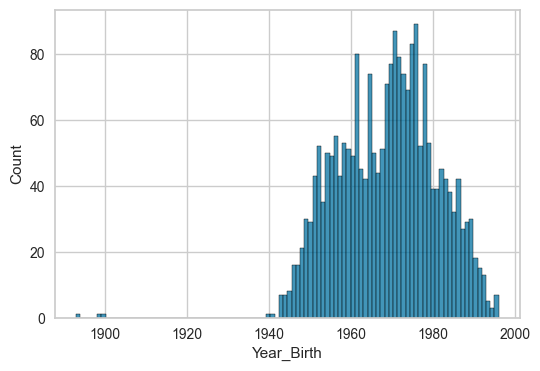

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df_remove_outliers['Year_Birth'], bins=100)

As we can see, above, there are a few customers born before 1900, which is quite impossible because they would be more than 120 years old. Let's remove those records from the dataset:

In [26]:
df_remove_outliers = df_remove_outliers[(df_remove_outliers["Year_Birth"]>1900)]


Secondly, let's plot the income histogram:

<AxesSubplot: xlabel='Income', ylabel='Count'>

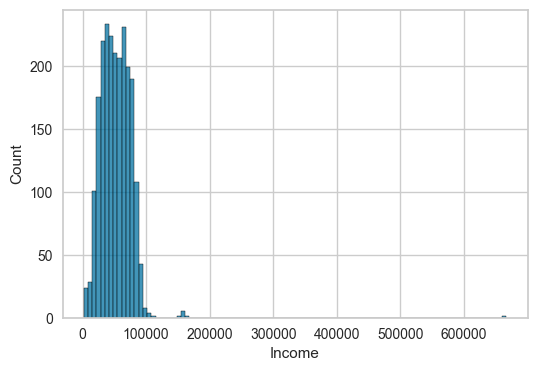

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df_remove_outliers['Income'], bins=100)

As we can see above, there is an outlier from income, let's remove it filtering the dataset by an income value lower than 600K.

In [28]:
df_remove_outliers = df_remove_outliers[(df_remove_outliers["Income"]<600000)]

<a id='TRANSFORMCAT'></a>
## Transform categorical variables to numerical


There are ml algorithms that only work with numerical data, for that reason we need to transform our category features into numerical features. We'll use numerical imputation with ordinal features, where exist an order in the possible values of the feature, for example ratings, size classifications, etc. For nominal variables we'll use one hot encoding. For more info [here](https://medium.com/@brandon93.w/converting-categorical-data-into-numerical-form-a-practical-guide-for-data-science-99fdf42d0e10).

### Ordinal features
The ordinal inputation has been done in [this](#FFE) section

### Nominal features

Let's check the nominals features we have:

In [29]:
df_numerical = df_remove_outliers.copy()
df_numerical.select_dtypes('object').columns

Index(['Marital_Status'], dtype='object')

In [30]:
df_numerical["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [31]:
df_numerical = df_numerical[(df_numerical['Marital_Status'] != 'Absurd') & (df_numerical['Marital_Status'] != 'YOLO')]

In [32]:
marital_status_map = {  
    'Together':    'Together',
    'Widow':       'Widow',
    'Divorced':    'Divorced',
    'Single' :     'Single',
    'Alone' :     'Single',
    'Married':    'Together'
    }

## Absurd, YOLO remove

# Transforming Categorical features into numerical features
df_numerical.loc[:,'Marital_Status'] = df_numerical['Marital_Status'].map(marital_status_map)
print(df_numerical["Marital_Status"].unique())

['Single' 'Together' 'Divorced' 'Widow']


Let's use **dummy encoding** to encode the rest of categorical features. First, let's input an 'unknown' value for those nan values:

In [33]:
#Input 'unknown' value to the features we want to apply one hot encoding
df_numerical[df_numerical.select_dtypes('object').columns] = df_numerical[df_numerical.select_dtypes('object').columns].fillna('unknown')
#Apply dummy encoding
df_numerical = pd.get_dummies(df_numerical, columns=df_numerical.select_dtypes('object').columns )
df_numerical.head(5)

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Spent,Purchases,Children,Is_Parent,Total_Offers_Accepted,Customer_purchase_deal,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,3,58138.0,0,0,58,635,88,546,172,...,1617,22,0,0,1,True,0,1,0,0
1,1954,3,46344.0,1,1,38,11,1,6,2,...,27,4,2,1,0,True,0,1,0,0
2,1965,3,71613.0,0,0,26,426,49,127,111,...,776,20,0,0,0,True,0,0,1,0
3,1984,3,26646.0,1,0,26,11,4,20,10,...,53,6,1,1,0,True,0,0,1,0
4,1981,5,58293.0,1,0,94,173,43,118,46,...,422,14,1,1,0,True,0,0,1,0


<a id='NULL'></a>
## Input missing values

Let's refresh how much null values we have:

In [34]:
total_null_values = df_numerical.isna().sum().sort_values(ascending = False)
perc_null_values = round(df_numerical.isna().sum().sort_values(ascending = False)/len(df_numerical)*100,2)
total_null_values = total_null_values.to_frame(name="count_nulls")
perc_null_values = perc_null_values.to_frame(name="perc_null")
df_null_values = pd.concat([total_null_values, perc_null_values], axis=1)
df_null_values.head(5)

,count_nulls,perc_null
Year_Birth,0,0.0
Purchases,0,0.0
AcceptedCmp1,0,0.0
AcceptedCmp2,0,0.0
Complain,0,0.0


There's no nulls left and all features are numerical, so we could use this dataset in the case that the model/library we'll try on demands a numerical and non null data.

<a id='METRIC'></a>
## Performance Metric

For clustering problems, we don't have a real value to compare with the output of our algorithm to measure how good or how poor is performing the algorithm. Anyway, exists several metrics to input to our clustering results to know if the results of the clustering are useful and valuable. Ideally, we would like our clusters to be the most separated to each other possible, and with the less inner dispersion possible for each cluster, i.e., to have well separated and well defined clusters. 

So, let's try to measure the results of a clustering based on these parameters. To do so, we'll use the **silouette score**. This measure quantifies how similar an instance is to its own cluster (cohesion) compared to other clusters (separation). This score is upper bounded by 1 and lower bounded by -1, and its interpretation is as following: 

- A high silhouette score (close to +1) indicates that the instance is well matched to its own cluster and poorly matched to neighboring clusters, suggesting a good clustering assignment.
- A silhouette score around 0 indicates overlapping clusters, where the instance could be assigned to either of the neighboring clusters.
- A low silhouette score (close to -1) suggests that the instance may have been assigned to the wrong cluster.

[Here](https://medium.com/@Suraj_Yadav/silhouette-coefficient-explained-with-a-practical-example-assessing-cluster-fit-c0bb3fdef719) for more information.

<a id='VISUAL'></a>
## Visual Inspection

Visualizing the data and looking for natural separations or patterns can help us decide on the number of clusters. Because we're dealing with more than 3 features, we have to use PCA to be able to visualize the data properly. We'll keep the top 3 principal components to visualize the representation of the data in 3 dimensions:

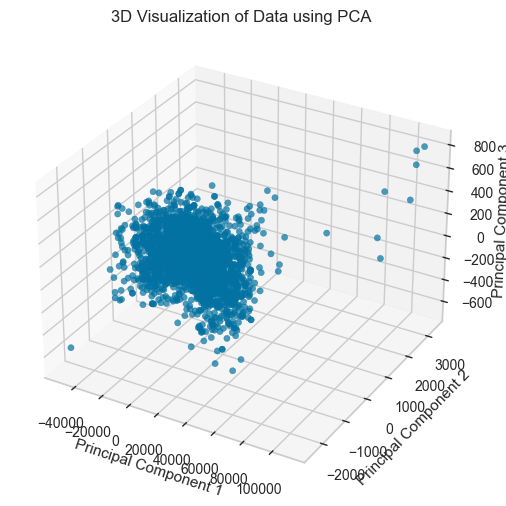

In [35]:
%matplotlib inline
df_model = df_numerical.copy()

# Apply PCA to reduce the data to 3D
pca = PCA(n_components=3)
data_3d = pca.fit_transform(df_model)

# Visualize the 3D data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Data using PCA')

plt.show()

Looking the above chart, seems like it could have some kind of pattern, but let's zoom it a bit to check it better:

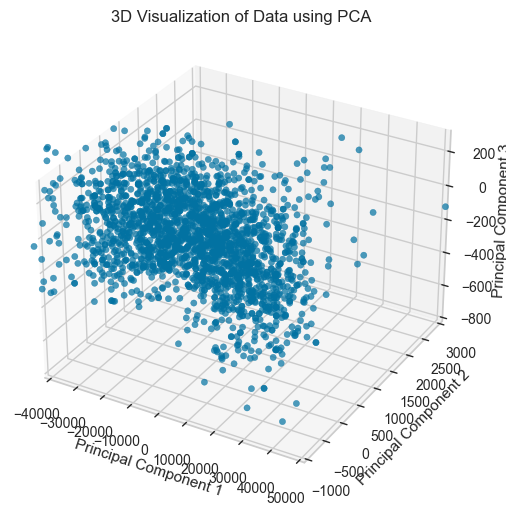

In [36]:
# Visualize the 3D data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Data using PCA')
ax.set_xlim([-40000,50000])
ax.set_ylim([-1000,3000])
ax.set_zlim([-800,300])
plt.show()

It seems like we could fit the data in the two following clusters:
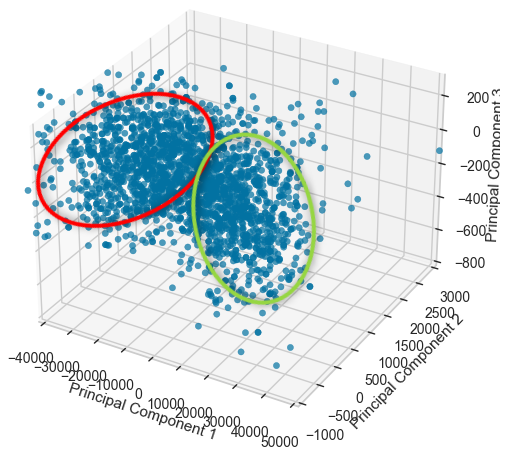

Finally, let's check how the top 3 principal components explain the original data:

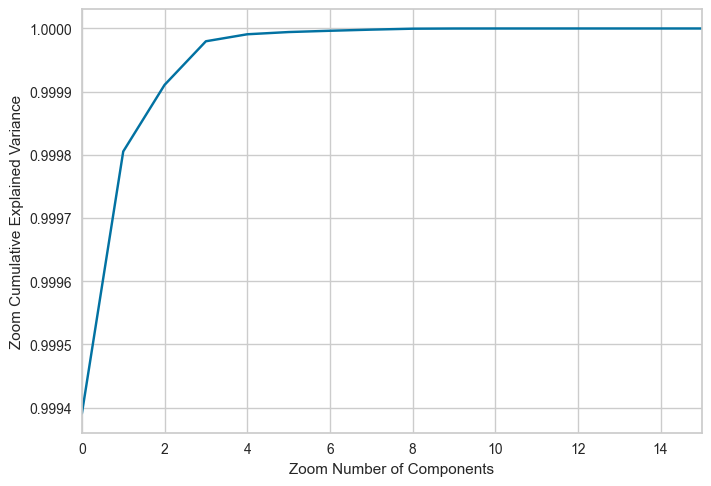

In [37]:
#Apply PCA method to the training data
pca = PCA()
pca.fit(df_model)

# EXPLAINED VARIANCE
# Plot cumulative explained variance against number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Zoom Number of Components')
plt.ylabel('Zoom Cumulative Explained Variance')
plt.xlim(0,15)
plt.grid(True)
plt.show()

The top 3 principal components explain more than the 99.99% of the variability of the data, so we can expect that this visual interpretation gives us intuition about the number of components we'll get form clustering.


<a id='MODELS'></a>
## Models

In this section, we'll try to find a model able to predict the house price sale based on all the features. To do so, we'll use a hyperparameter tuning and a cross validation. 



In [38]:
df_results = pd.DataFrame()  # Here we'll store the performance metrics of each model

<a id='CENTROID'></a>
### **Centroid-based Clustering**

Centroid-based clustering is a type of clustering algorithm where **clusters are represented by a central point** or centroid. The idea is to assign data points to the cluster whose centroid is the closest. These algorithms are part of the partitioning clustering methods, where the data is partitioned into distinct non-overlapping subsets or clusters. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. The most common centroid-based clustering algorithm is K-Means.

The principal idea of K-means is to partition the data into K clusters, where K is a user-defined parameter. The algorithm aims to minimize the sum of squared distances between data points and their respective cluster centroids.


<a id='KMEANS'></a>
#### **K-means**

In this method, we have to define a number of K clusters we want to group our data. A good method to find an estimation of the number of partitions is the Elbow method. This method is based on calculating the sum of squared distance for each point of each cluster with its centroid for different number of clusters (k) and selecting the k which the distance starts to diminish in a less substantial way. The idea behind the elbow method is that the sum squared distance falls quickly for a small number of clusters and then it slows down leading to an elbow formation in the curve.

More info [here](https://medium.com/codex/k-means-c5763e50898e).

Let's check which range of k-values could be the best for our problem:

Elbow Method to determine the number of clusters to be formed:


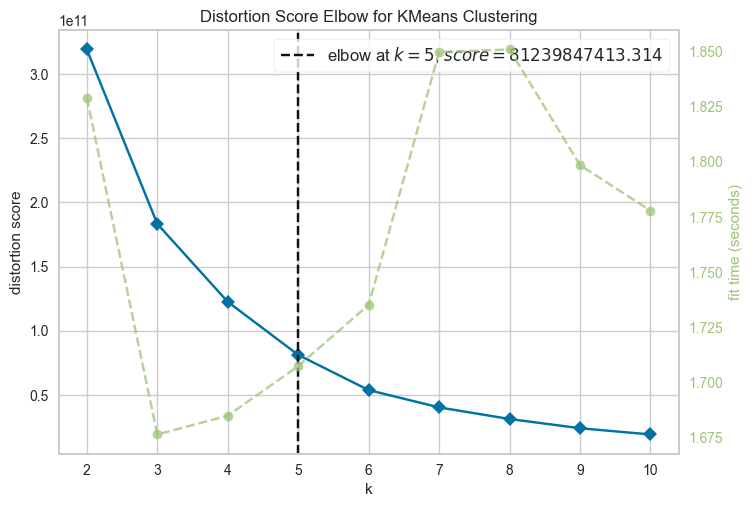

CPU times: total: 1min 32s
Wall time: 16.6 s


<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
%%time
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_model)
Elbow_M.show()

As we can see above, the ideal number of K would be 5. This method takes into account the sum of the squared distances of each point to its centroid. In this case, in order to compare the results of all algorithms we'll try, we'll score the clustering using the silhouette score. So, we'll train k-means with several values and because the elbow method has indicated that 5 would be the better k, we'll tune k means around this value:

In [40]:
n_clusters = [2, 3, 4, 5, 6]
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    cluster_kmeans = kmeans.fit_predict(df_model)
    score = silhouette_score(df_model,cluster_kmeans)
    print("The silhouette score for " + str(n) +" number of clusters is: " + str(score))
    

The silhouette score for 2 number of clusters is: 0.6057349888625417
The silhouette score for 3 number of clusters is: 0.5398062738723561
The silhouette score for 4 number of clusters is: 0.5277546761318638
The silhouette score for 5 number of clusters is: 0.535063608064955
The silhouette score for 6 number of clusters is: 0.5351160540490361


The best hyperparameter is using k = 2.

In [41]:
best_number_clusters = 2
kmeans = KMeans(n_clusters=best_number_clusters)
cluster_kmeans = kmeans.fit_predict(df_model)
unique, counts = np.unique(cluster_kmeans, return_counts=True)
kmeans_df = pd.DataFrame(data=[best_number_clusters, silhouette_score(df_model,cluster_kmeans), str(dict(zip(unique, counts)))],
             columns=["K-means"],
             index=['clusters','silhouette score', 'cluster configuration'])
df_results = pd.concat([df_results,kmeans_df.T])
kmeans_df.T

,clusters,silhouette score,cluster configuration
K-means,2,0.605735,"{0: 1076, 1: 1132}"


<a id='DISTRIBUTION'></a>
### **Distribution-based Clustering**

Distribution-based clustering creates and **groups data points based on their likely hood of belonging to the same probability distribution** (Gaussian, Binomial, etc.) in the data.

The most common distribution based clustering is the Gaussian Mixture model, that assumes that the data is generated by a mixture of several Gaussian distributions. Each Gaussian component represents a cluster.

<a id='GAUSSIAN'></a>
#### **Gaussian Mixture Model (GMM):**



In [42]:
n_clusters = [2, 3, 4]
for n in n_clusters:
    GMM = GaussianMixture(n_components=n)
    cluster_gmm = GMM.fit_predict(df_model)
    score = silhouette_score(df_model,cluster_gmm)
    print("The silhouette score for " + str(n) +" number of clusters is: " + str(score))

The silhouette score for 2 number of clusters is: 0.3771537774035194
The silhouette score for 3 number of clusters is: 0.2538906740247462
The silhouette score for 4 number of clusters is: 0.09952574481966549


In [43]:
best_number_clusters = 2
GMM = GaussianMixture(n_components=best_number_clusters)
cluster_gmm = GMM.fit_predict(df_model)
unique, counts = np.unique(cluster_gmm, return_counts=True)
gmm_df = pd.DataFrame(data=[best_number_clusters, silhouette_score(df_model,cluster_gmm), str(dict(zip(unique, counts)))],
             columns=["Gaussian Mixture Model"],
             index=['clusters','silhouette score', 'cluster configuration'])
df_results = pd.concat([df_results,gmm_df.T])
gmm_df.T

,clusters,silhouette score,cluster configuration
Gaussian Mixture Model,2,0.377154,"{0: 672, 1: 1536}"


<a id='DENSITY'></a>
### **Density-based Clustering**
Density-based clustering is a type of clustering algorithm that identifies clusters based on the density of data points in the feature space. These families of methods find regions in the data space where the density of points is higher than in surrounding areas. This makes density-based methods particularly useful for discovering clusters with varying shapes and sizes, and can handle noise and outliers (by treating them as isolated points with low density).

We can highlight these two algorithms:
- DBSCAN: is designed to identify clusters of arbitrary shapes and sizes, while also being able to handle noisy data and outliers. This method can be tuned by two parameters $\epsilon$ and min_samples. By $\epsilon$ we define a radius distance with which all data points of a same cluster must be with at least one core point. A core point is a point in the cluster that at least there are min_samples points within a $\epsilon$ distance.  DBSCAN is able to handle clusters with varying densities, but it may struggle to identify clusters with widely varying densities, leading to either over or under clustering.

- HDBSCAN: This method is an alternative to the previous method handling cluster with widely varying densities. HDBSCAN constructs an undirected acyclic graph with weighted edges, where the weights measure the density between two points. From this graph, the minimum spanning tree is derived, which is then transformed into a dendrogram. Clusters are formed by cutting the dendrogram, with the cut determined to maximize the density between clusters. This algorithm has two main parameters: min_samples (the min number of points to consider a region as dense) and min_cluster_size (the min number of point that has to have any cluster to be formed).

[Here](https://behesht.medium.com/unsupervised-learning-density-based-clustering-dbscan-1b4d0128cbc1) and [here](https://www.youtube.com/watch?v=dGsxd67IFiU&ab_channel=PyData) for more information.

<a id='DBSCAN'></a>
#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
As we've said before, DBSCAN is a method that can be tuned by two parameters. To find the best silhouette score we'll do hyperparameter tuning with both parameters. To guess which range of values would fit more accurately the $\epsilon$ value we'll plot the histogram of distances of each point of the dataset to its nearest neighbor. The optimal value for $\epsilon$ would be near the point of maximum curvature in the histogram.
    
[Here](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/) and [here](https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556) for more information.


First, we find the nearest point to each instance of the dataset and which is its distance:

In [44]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_model)
distances, indices = nbrs.kneighbors(df_model)

Let's plot the distances histogram:

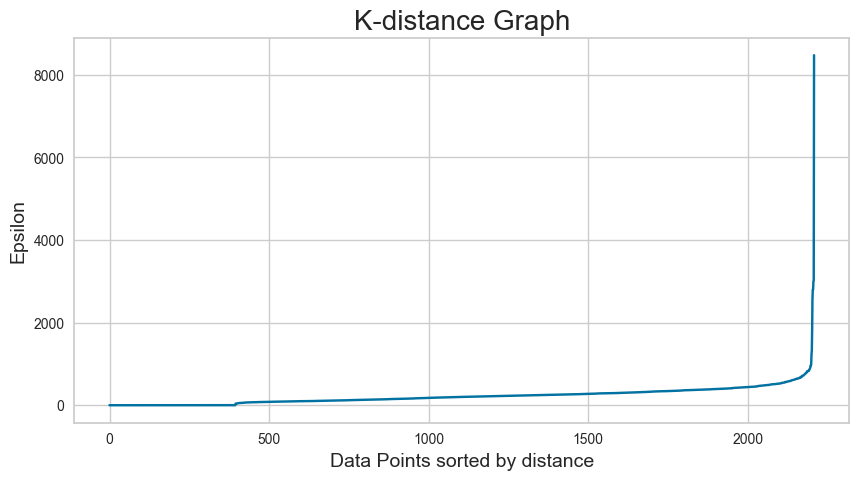

In [45]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Let's zoom the plot into the curve to have a better estimation of $\epsilon$:

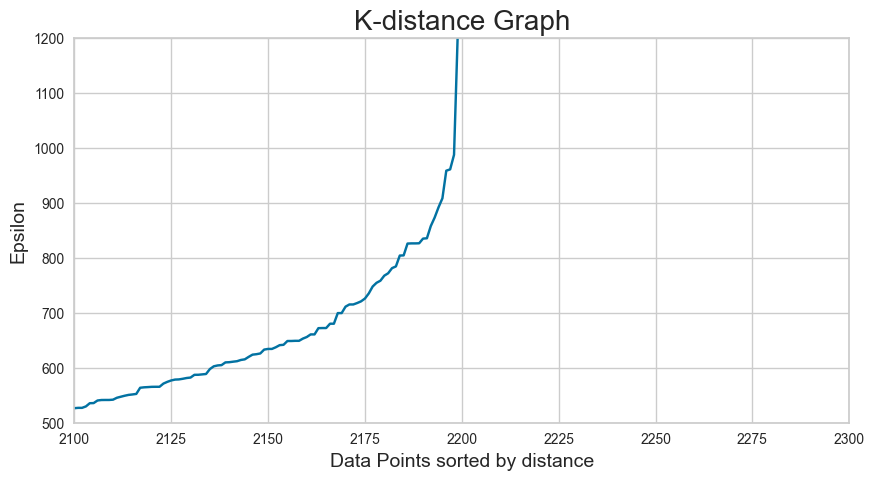

In [46]:
# Plotting K-distance Graph
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.xlim([2100,2300])
plt.ylim([500,1200])
plt.show()

It seems that the optimal epsilon would be around 800-1100, let's try it:

In [47]:
eps_values = [800,900,1000,1100]
min_samples_values =  [15,20,25,30]
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_dbscan = dbscan.fit_predict(df_model)
        if len(set(cluster_dbscan)) > 1:
            score = silhouette_score(df_model,cluster_dbscan)
            print("The silhouette score for eps value: " + str(eps) +" and for min_sample value: " + str(min_samples) + ", is: " + str(score) + ", number of clusters are:" + str(len(set(cluster_dbscan))))
        else: 
            print("The silhouette score for eps value: " + str(eps) +" and for min_sample value: " + str(min_samples) + ", is null because only a cluster has been set")

The silhouette score for eps value: 800 and for min_sample value: 15, is: 0.21515102438825967, number of clusters are:3
The silhouette score for eps value: 800 and for min_sample value: 20, is: -0.0970630328944648, number of clusters are:7
The silhouette score for eps value: 800 and for min_sample value: 25, is: 0.13820995690930868, number of clusters are:9
The silhouette score for eps value: 800 and for min_sample value: 30, is: 0.0538621424472055, number of clusters are:7
The silhouette score for eps value: 900 and for min_sample value: 15, is: -0.007097376432393922, number of clusters are:4
The silhouette score for eps value: 900 and for min_sample value: 20, is: 0.4492814981392891, number of clusters are:2
The silhouette score for eps value: 900 and for min_sample value: 25, is: -0.07340639445060768, number of clusters are:4
The silhouette score for eps value: 900 and for min_sample value: 30, is: -0.07135730528033088, number of clusters are:5
The silhouette score for eps value: 10

The best hyperparameters are 1100 value for $\epsilon$ and 20 value for min_sample:

In [48]:
dbscan = DBSCAN(eps=1100, min_samples=20)
cluster_dbscan = dbscan.fit_predict(df_model)
unique, counts = np.unique(cluster_dbscan, return_counts=True)
dbscan_df = pd.DataFrame(data=[len(set(cluster_dbscan)), silhouette_score(df_model,cluster_dbscan), str(dict(zip(unique, counts)))],
             columns=["DBSCAN"],
             index=['clusters','silhouette score', 'cluster configuration'])
df_results = pd.concat([df_results,dbscan_df.T])
dbscan_df.T

,clusters,silhouette score,cluster configuration
DBSCAN,2,0.490231,"{-1: 107, 0: 2101}"


<a id='HDBSCAN'></a>
#### HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise):

As we've said before, HDBSCAN is a method that can be tuned by two main parameters. To find the best silhouette score we'll do the hyperparameter tuning with both parameters. To set a range of values of the min_cluster_size parameter, we'll set up minimum to 50, because we have 2K customers and we don't want any group with less than 50 customers. On the other hand, we'll set as 5 the number of customers to consider a region as a dense region.
      
    
Let's search the best hyperparameters that maximizes the silhouette score:

In [49]:
# Define parameter grid for tuning
min_samples_values =  [5,8,10,12,15]
min_cluster_size_values = [50,100,150]
for min_samples_value in min_samples_values:
    for min_cluster_size in min_cluster_size_values:
        hdbscan = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples_value)
        cluster_hdbscan = hdbscan.fit_predict(df_model)
        if len(set(cluster_hdbscan)) > 1:
            score = silhouette_score(df_model,cluster_hdbscan)
            print("The silhouette score for min_sample:" + str(min_samples_value) + " and min_cluster_size value: " + str(min_cluster_size) +", is: " + str(score) +  ", number of clusters are:" + str(len(set(cluster_hdbscan))))
        else: 
            print("The silhouette score for min_sample:" + str(min_samples_value) + " and min_cluster_size value: " + str(min_cluster_size) +", is null because only a cluster has been set")

The silhouette score for min_sample:5 and min_cluster_size value: 50, is: 0.036249431815494663, number of clusters are:9
The silhouette score for min_sample:5 and min_cluster_size value: 100, is: 0.043591460343156474, number of clusters are:6
The silhouette score for min_sample:5 and min_cluster_size value: 150, is null because only a cluster has been set
The silhouette score for min_sample:8 and min_cluster_size value: 50, is: 0.13352417000194075, number of clusters are:7
The silhouette score for min_sample:8 and min_cluster_size value: 100, is: 0.19758886064078107, number of clusters are:4
The silhouette score for min_sample:8 and min_cluster_size value: 150, is: 0.301150821579379, number of clusters are:3
The silhouette score for min_sample:10 and min_cluster_size value: 50, is: 0.13217002251477386, number of clusters are:6
The silhouette score for min_sample:10 and min_cluster_size value: 100, is: 0.2614008077759045, number of clusters are:3
The silhouette score for min_sample:10 a

The best hyperparameter is using the min_cluster_size = 150 and min_samples = 8.

In [50]:
hdbscan = HDBSCAN(min_cluster_size=150, min_samples=8)
cluster_hdbscan = hdbscan.fit_predict(df_model)
unique, counts = np.unique(cluster_hdbscan, return_counts=True)
hdbscan_df = pd.DataFrame(data=[len(set(cluster_hdbscan)), silhouette_score(df_model,cluster_hdbscan), str(dict(zip(unique, counts)))],
             columns=["HDBSCAN"],
             index=['clusters','silhouette score', 'cluster configuration'])
df_results = pd.concat([df_results,hdbscan_df.T])
hdbscan_df.T

,clusters,silhouette score,cluster configuration
HDBSCAN,3,0.301151,"{-1: 700, 0: 467, 1: 1041}"


<a id='HIERARCHICAL'></a>
### **Hierarchical Clustering**

Hierarchical clustering is a method of cluster analysis that group elements in a data set in a hierarchical structure based on their similarities to each other. This method is used especially to understand hierarchical structures in the data set rather than to find specific groups. The clusters are made by "cutting" the dendogram of the hierarchical structure at some convenient level. Hierarchical clustering can be approached by two opposite methods: 

- **Agglomerative**: All the records in the database are initially considered as a single cluster and the main idea is joining iteratively the two closest clusters and creating a new one larger with them. This process is done until all the records are included in the same cluster.
- **Segmentative**: This is the opposite as the above method. Initially, all records are included in the same cluster and iteratively are split until every record is a single cluster.

There are 4 main methods to join the clusters:
- **Ward**: Calculates the sum of the square of the distances of the two sets and divide by the total of distances.
- **Complete**: Based on the distance of the furthest items between two sets.
- **Single**: The distance of the closest items between two clusters is taken as a basis.
- **Average**: Based on the average distance of all items between two clusters.

For more info [here](https://medium.com/@muratgulcan/hierarchical-clustering-with-python-basic-concepts-and-application-cd5f5dc95b1f) and [here](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec).


<a id='AGGLOMERATIVE'></a>
#### Agglomerative
Let's search the best hyperparameters that maximizes the silhouette score:

In [51]:
# Evaluate silhouette score for different values of n_clusters
for linkage_method in ['ward', 'complete', 'average', 'single']:
    for n_clusters in range(2, 6):
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        cluster_agglomerative = agglomerative.fit_predict(df_model)
        silhouette_avg = silhouette_score(df_model, cluster_agglomerative)
        print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.3f} using the {linkage_method} method")

For n_clusters = 2, the average silhouette score is 0.597 using the ward method
For n_clusters = 3, the average silhouette score is 0.526 using the ward method
For n_clusters = 4, the average silhouette score is 0.496 using the ward method
For n_clusters = 5, the average silhouette score is 0.507 using the ward method
For n_clusters = 2, the average silhouette score is 0.764 using the complete method
For n_clusters = 3, the average silhouette score is 0.576 using the complete method
For n_clusters = 4, the average silhouette score is 0.505 using the complete method
For n_clusters = 5, the average silhouette score is 0.438 using the complete method
For n_clusters = 2, the average silhouette score is 0.694 using the average method
For n_clusters = 3, the average silhouette score is 0.474 using the average method
For n_clusters = 4, the average silhouette score is 0.552 using the average method
For n_clusters = 5, the average silhouette score is 0.485 using the average method
For n_cluste

The best hyperparameters are cutting the dendogram forming 2 clusters and using the single or complex linkage method:

In [52]:
best_number_clusters = 2
linkage_method = 'single'
agglomerative = AgglomerativeClustering(n_clusters=best_number_clusters, linkage = linkage_method)
cluster_agglomerative = agglomerative.fit_predict(df_model)
unique, counts = np.unique(cluster_agglomerative, return_counts=True)
agglomerative_df = pd.DataFrame(data=[best_number_clusters, silhouette_score(df_model,cluster_agglomerative), str(dict(zip(unique, counts)))],
             columns=["Agglomerative"],
             index=['clusters','silhouette score', 'cluster configuration'])
df_results = pd.concat([df_results,agglomerative_df.T])
agglomerative_df.T

,clusters,silhouette score,cluster configuration
Agglomerative,2,0.764094,"{0: 2201, 1: 7}"


<a id='1MC'></a>
## Model comparison

Let's take a look into the results of every model:

In [53]:
df_results.sort_values(by='silhouette score', ascending=False)

,clusters,silhouette score,cluster configuration
Agglomerative,2,0.764094,"{0: 2201, 1: 7}"
K-means,2,0.605735,"{0: 1076, 1: 1132}"
DBSCAN,2,0.490231,"{-1: 107, 0: 2101}"
Gaussian Mixture Model,2,0.377154,"{0: 672, 1: 1536}"
HDBSCAN,3,0.301151,"{-1: 700, 0: 467, 1: 1041}"


As we can see above, the best two models, in terms of the silhouette socre are: Agglomerative and K-means. Any way, for the Agglomerative, seems that the distribution of the customers in cluster are unequal. The cluster '1' has only 7 customers and the cluster '0' has more than 2K, so this might not be a good segmentation of the data, seems that the cluster '1' could be outliers or noise.

Let's plot the clusters formed by these two algorithms. Let's plot the Agglomerative results first:

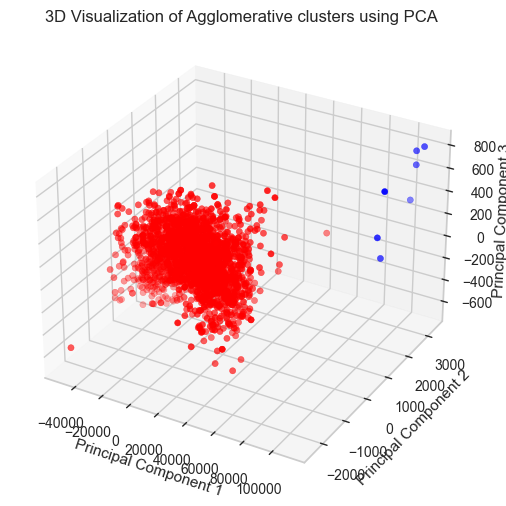

In [54]:
cmap = colors.ListedColormap(["#FF0000", "#0000FF"])

# Visualize the 3D data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2],  c=cluster_agglomerative, cmap=cmap)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Agglomerative clusters using PCA')

plt.show()

The red clusters just seems outliers from the blue cluster. Let's plot the K-means clusters:

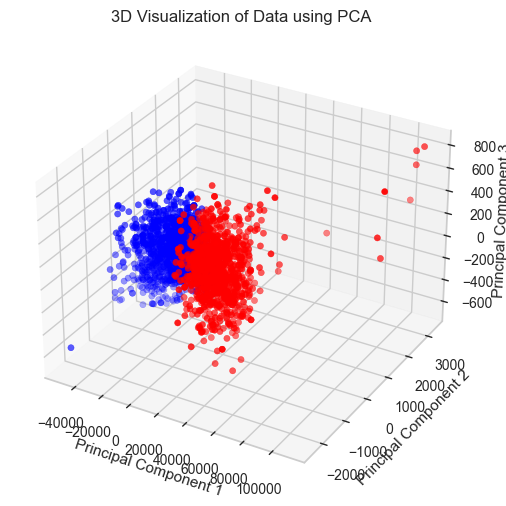

In [55]:
# Visualize the 3D data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2],  c=cluster_kmeans, cmap=cmap)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Data using PCA')

plt.show()

This seems a better segmentation. Actually, this clustering seems pretty much the guess we did in the [visual inspection section](#VISUAL).

Anyway, let's try to improve these models by standardizing the data prior the modeling:

<a id='STANDARIZATION'></a>
## Apply data standardization to Top performing models

First of all, let's standarize our data:

In [56]:
standard = StandardScaler()
df_scaled = standard.fit_transform(df_model) 

### Standarize for Kmeans



Elbow Method to determine the number of clusters to be formed:


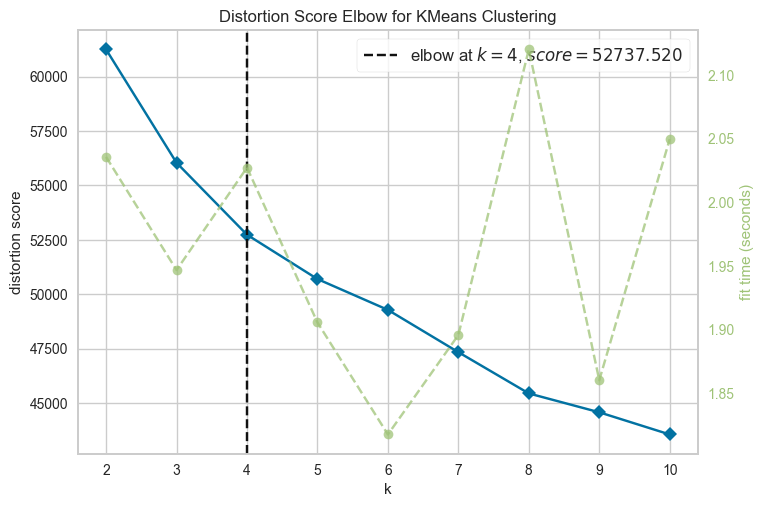

CPU times: total: 1min 11s
Wall time: 18.2 s


<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
%%time
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_scaled)
Elbow_M.show()

In [58]:
%%time
n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n in n_clusters:
    pipeline_kmeans_scaled = Pipeline([
                           ('scaler', StandardScaler()),
                           ('kmeans', KMeans(n_clusters=n))])
    cluster_kmeans_scaled = pipeline_kmeans_scaled.fit_predict(df_model)
    score = silhouette_score(df_scaled,cluster_kmeans_scaled)
    print("The silhouette score for " + str(n) +" number of clusters is: " + str(score))

The silhouette score for 2 number of clusters is: 0.23210563753612956
The silhouette score for 3 number of clusters is: 0.16775900335395316
The silhouette score for 4 number of clusters is: 0.16509369449680927
The silhouette score for 5 number of clusters is: 0.16871632587813096
The silhouette score for 6 number of clusters is: 0.10108891425261167
The silhouette score for 7 number of clusters is: 0.12349125184729737
The silhouette score for 8 number of clusters is: 0.09427557059322109
CPU times: total: 1min 4s
Wall time: 14.5 s


In [59]:
best_number_clusters = 2
pipeline_kmeans_scaled = Pipeline([
                           ('scaler', StandardScaler()),
                           ('kmeans', KMeans(n_clusters=best_number_clusters))])
cluster_kmeans_scaled = pipeline_kmeans_scaled.fit_predict(df_model)
unique, counts = np.unique(cluster_kmeans_scaled, return_counts=True)
kmeans_scaled_df = pd.DataFrame(data=[best_number_clusters, silhouette_score(df_scaled,cluster_kmeans_scaled), str(dict(zip(unique, counts)))],
             columns=["K-means Scaled"],
             index=['clusters','silhouette score', 'cluster configuration'])
df_results = pd.concat([df_results,kmeans_scaled_df.T])
kmeans_scaled_df.T

,clusters,silhouette score,cluster configuration
K-means Scaled,2,0.232106,"{0: 887, 1: 1321}"


### Standarize Agglomerative

In [60]:
%%time
for linkage_method in ['ward', 'complete', 'average', 'single']:
    for n_clusters in range(2, 6):
        pipeline_agglomerative_scaled = Pipeline([
                           ('scaler', StandardScaler()),
                           ('agglomerative',AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method))])
        cluster_agglomerative_scaled = pipeline_agglomerative_scaled.fit_predict(df_model)
        silhouette_avg = silhouette_score(df_scaled,cluster_agglomerative_scaled)
        print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.3f} using the {linkage_method} method")        

For n_clusters = 2, the average silhouette score is 0.179 using the ward method
For n_clusters = 3, the average silhouette score is 0.148 using the ward method
For n_clusters = 4, the average silhouette score is 0.157 using the ward method
For n_clusters = 5, the average silhouette score is 0.152 using the ward method
For n_clusters = 2, the average silhouette score is 0.491 using the complete method
For n_clusters = 3, the average silhouette score is 0.432 using the complete method
For n_clusters = 4, the average silhouette score is 0.402 using the complete method
For n_clusters = 5, the average silhouette score is 0.388 using the complete method
For n_clusters = 2, the average silhouette score is 0.491 using the average method
For n_clusters = 3, the average silhouette score is 0.448 using the average method
For n_clusters = 4, the average silhouette score is 0.430 using the average method
For n_clusters = 5, the average silhouette score is 0.393 using the average method
For n_cluste

In [61]:
n_clusters = 2
linkage_method = 'complete'
pipeline_agglomerative_scaled = Pipeline([
                   ('scaler', StandardScaler()),
                   ('agglomerative',AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method))])
cluster_agglomerative_scaled = pipeline_agglomerative_scaled.fit_predict(df_model)
unique, counts = np.unique(cluster_agglomerative_scaled, return_counts=True)
agglomerative_scaled_df = pd.DataFrame(data=[n_clusters, silhouette_score(df_scaled,cluster_agglomerative_scaled), str(dict(zip(unique, counts)))],
             columns=["Agglomerative Scaled"],
             index=['clusters','silhouette score', 'cluster configuration'])
df_results = pd.concat([df_results,agglomerative_scaled_df.T])
agglomerative_scaled_df.T

,clusters,silhouette score,cluster configuration
Agglomerative Scaled,2,0.490812,"{0: 2204, 1: 4}"


<a id='BEST'></a>
## Best Model

As you can see in the next cell, using the PCA method has had little effect on the performance and the best model is still the HDBSCAN and K-means without normalization.

In [62]:
df_results.sort_values(by='silhouette score', ascending=False)

,clusters,silhouette score,cluster configuration
Agglomerative,2,0.764094,"{0: 2201, 1: 7}"
K-means,2,0.605735,"{0: 1076, 1: 1132}"
Agglomerative Scaled,2,0.490812,"{0: 2204, 1: 4}"
DBSCAN,2,0.490231,"{-1: 107, 0: 2101}"
Gaussian Mixture Model,2,0.377154,"{0: 672, 1: 1536}"
HDBSCAN,3,0.301151,"{-1: 700, 0: 467, 1: 1041}"
K-means Scaled,2,0.232106,"{0: 887, 1: 1321}"


Finally, we have to pick a model to segment our clients. We're going to **pick the K-means model** because has a good silhouette value and the clusters we get are pretty similar to the ones we've guessed.

### Save model

Now we have find a good model, we'll save it in order to use it in the future:

In [63]:
best_number_clusters = 2
kmeans = KMeans(n_clusters=best_number_clusters, random_state=124)
df_model = df_model.reindex(columns=sorted(df_model.columns))
kmeans_model = kmeans.fit(df_model)
kmeans_model.predict(df_model)

array([0, 1, 0, ..., 0, 0, 0])

In [64]:
filename = "clustering_clients_kmeans.pickle"
pickle.dump(kmeans_model, open(filename, "wb"))

<a id='INTERPRET'></a>
### Interpret de model

Finally, the last important thing of clustering is give a meaning to each cluster we've partitioned the data. To do so, we'll treat the dataset and the output of the clustering algorithm as a multiclass classification problem. We'll try to find a model able to fit the output label of the clustering model. In order we can give an interpretation, we are going to [fit our data into a tree model](https://sharmashorya1996.medium.com/unlocking-insights-interpreting-clustering-results-through-decision-trees-f00ca7fbe783). The rules of splitting the data into each classification label, will give us insights of every cluster and we could define the characteristics of each cluster based on the most important features of the classification problem.

In [65]:
%%time
# Get the data and split in train and test
X = df_model
y = kmeans_model.fit_predict(df_model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Define the model and train the data
sklearn_dt = DecisionTreeClassifier(random_state=123) 
sklearn_dt.fit(X_train, y_train)
# Evaluate the model in the test set
pred_sklearn_dt = sklearn_dt.predict(X_test)
dt_cm =confusion_matrix(y_test,pred_sklearn_dt)
dt_df = pd.DataFrame(data=[accuracy_score(y_test, pred_sklearn_dt), recall_score(y_test, pred_sklearn_dt),
                   precision_score(y_test, pred_sklearn_dt), roc_auc_score(y_test, pred_sklearn_dt)],
             columns=['Decision Tree Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

print("Performance metrics:\n")
print(dt_df)
print("\n")
print("Confusion matrix:\n")
print(dt_cm)

Performance metrics:

               Decision Tree Score
Accuracy                       1.0
Recall                         1.0
Precision                      1.0
ROC AUC Score                  1.0


Confusion matrix:

[[323   0]
 [  0 340]]
CPU times: total: 8.94 s
Wall time: 1.91 s


We've find a perfect tree that fits the data perfectly, let's plot the tree in order to get some insights:

[Text(0.5, 0.75, 'Income <= 52345.5\ngini = 0.5\nsamples = 1545\nvalue = [753, 792]\nclass = 1'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 792\nvalue = [0, 792]\nclass = 1'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 753\nvalue = [753, 0]\nclass = 0')]

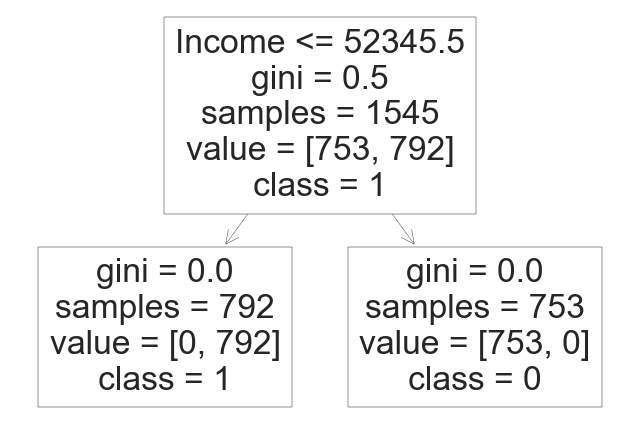

In [66]:
tree.plot_tree(sklearn_dt,feature_names=list(df_model.columns),class_names=["0","1"])

As we can see above, we've found out that the difference about the customers of the two clusters just is the income among them. The clients that belong to the cluster '0' have an income greater than 52345,5$ and the clients the belong to the cluster '1' have an income lower than that. 

To sum up, we wanted to find a segmentation of our clients. We've found out that the best way to separate the is with 2 groups, and ultimately we have discovered that this separation in our clients is based on their income. As we can see in the following representation of our clients, there are two groups of our clients and we've labeled each group: Low Income Customer and High Income Customer:

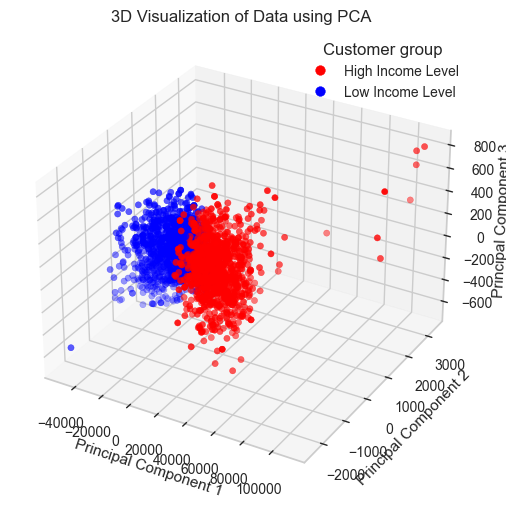

In [67]:
# Visualize the 3D data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=kmeans_model.fit_predict(df_model), cmap=cmap)
legend = ax.legend(handles = scatter.legend_elements()[0], labels = ["High Income Level","Low Income Level"],
                     title="Customer group")
# ax.add_artist(legend1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Data using PCA')

plt.show()

<a id='PYCARET'></a>
## Bonus: Pycaret

PyCaret is a Python library for simplified machine learning workflows, offering automated model training, hyperparameter tuning, and comprehensive visualizations. We'll use it to compare its results with ours.

[Here](https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080) for more information.

In [68]:
# check installed version
import pycaret
pycaret.__version__

'3.2.0'

In [69]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(df_model, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(2208, 35)"
2,Transformed data shape,"(2208, 35)"
3,Numeric features,34
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [70]:
pycaret_clustering = create_model(model='kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5278,5409.1521,0.5670,0,0,0


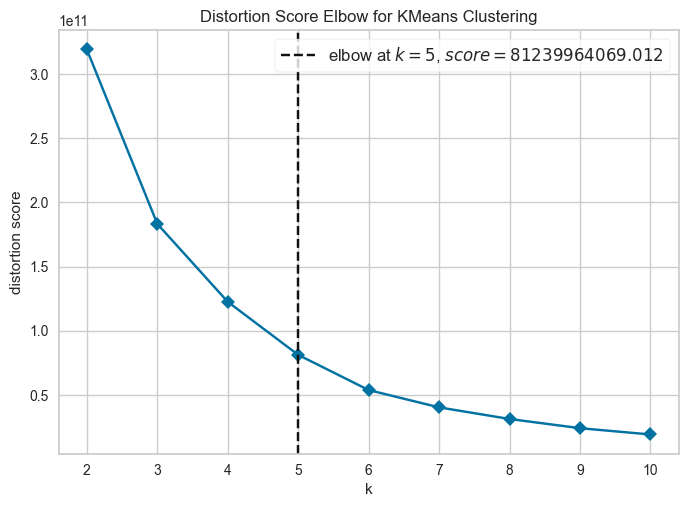

In [71]:
plot_model(pycaret_clustering, 'elbow')

In [72]:
model = create_model('kmeans', num_clusters = 2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6057,4880.6866,0.5247,0,0,0


As we can see above, we've get the same results of the silhouette score (0.657) than pycaret library.

<a id='PRODUCTION'></a>
# To production

To recap, what we have done so far is analyze a dataset on houses in the United States and we have created a model capable of predicting the selling price based on the features of the dataset. Now, we are going to leverage this model and truly see the value that this work will bring us.

First of all, let's load the new data, the model we've just created and apply the feature engineering necessary to being able to apply the model:

<a id='SHARE'></a>

### Share results with the company
An important part of an ML project is being able to make the trained model available for other teams or colleagues of the company to take advantage of the insights they can get of it. One technical way could be creating an API that our colleagues could make their own predictions. Another approach it could be to present the results in an interactive report and enable anyone with the link to get their own insights.

That's why I've created an API where you can request which group it belongs any existing or new customer based on their data. An example of a possible request and a response could be as the following:

In [75]:
import requests
import json

headers = {
        "accept": "application/json",
        "Content-Type": "application/json",
        }

data = {
        "ID": 1,
        "Year_Birth": 1957,
        "Education": 2,
        "Marital_Status": "Single",
        "Income": 56842,
        "Kidhome": 0,
        "Teenhome": 0,
        "Recency": 58,
        "MntWines": 635,
        "MntFruits": 88,
        "MntMeatProducts": 546,
        "MntFishProducts": 172,
        "MntSweetProducts": 88,
        "MntGoldProds": 88,
        "NumDealsPurchases": 3,
        "NumWebPurchases": 8,
        "NumCatalogPurchases": 10,
        "NumStorePurchases": 4,
        "NumWebVisitsMonth": 7,
        "AcceptedCmp3": 0,
        "AcceptedCmp4": 0,
        "AcceptedCmp5": 0,
        "AcceptedCmp1": 0,
        "AcceptedCmp2": 0,
        "Complain": 0,
        "Z_CostContact": 3,
        "Z_Revenue": 11,
        "Response": 1,
        "EnrolledDays": 55
        }

# make http request
response = requests.post("http://127.0.0.1:8000/GetCustomerGroup",
    headers=headers, data=json.dumps(data))
# if no error, print result
if response.status_code == 200:
    print(response.json())
else:
    print("An error ocurred")

The customer with ID: 1 belong to group of customers with high income level, with id group: 0
